In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [5]:
import pandas as pd

# Leer el archivo CSV en un DataFrame llamado ARC
ARC = pd.read_csv('./winequality-red.csv')

# Imprimir la forma del DataFrame ARC y las primeras filas
print(ARC.shape)
ARC.head()


(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
ARC.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


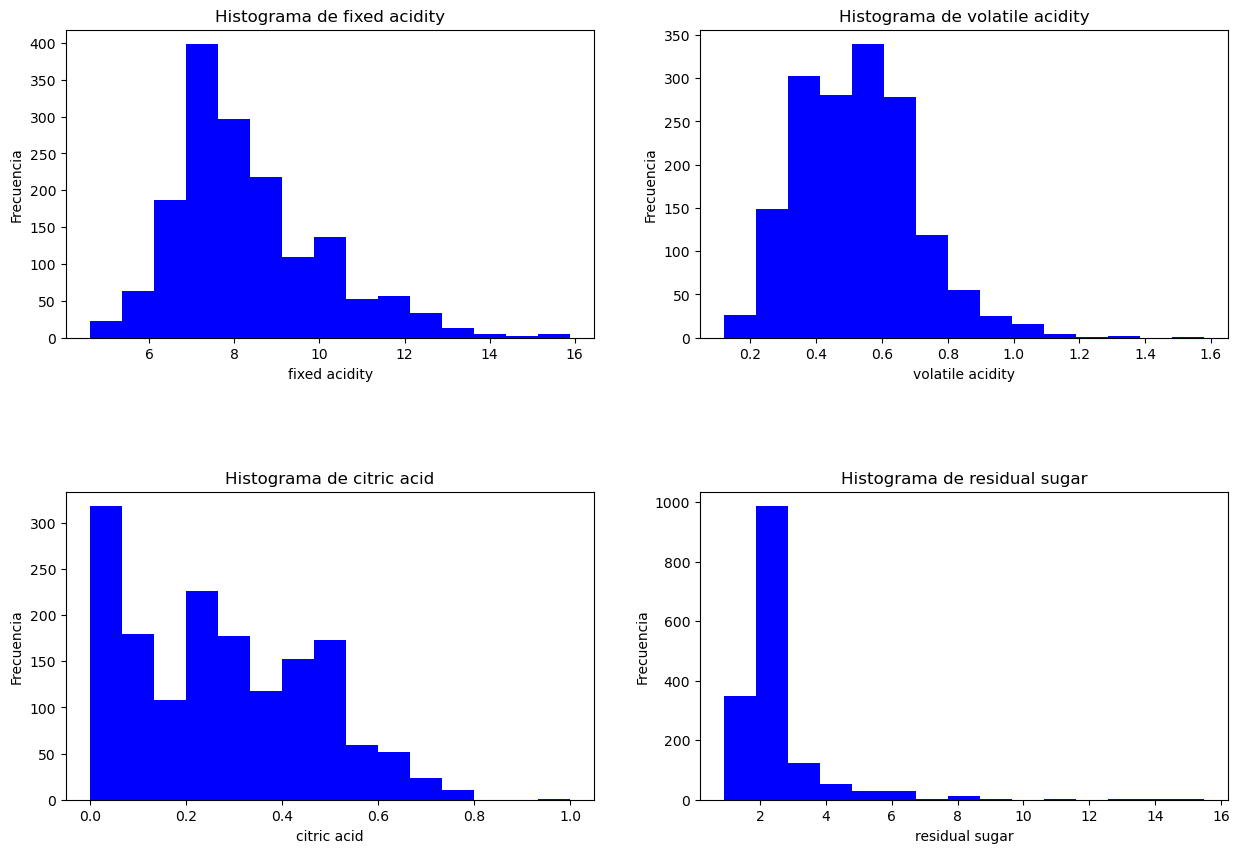

In [12]:
# Configuración de los gráficos
num_cols = len(ARC.columns)
num_rows = (num_cols + 1) // 2

# Limitar el número máximo de histogramas a 4
num_hist = min(4, num_cols)

# Subgráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

# Iterando sobre las columnas y crear los histogramas
for i, col in enumerate(ARC.columns[:num_hist]):
    ax = axes[i // 2, i % 2]
    ax.hist(ARC[col], bins=15, color='blue')  # Cambiar color a azul
    ax.set_title(f'Histograma de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Eliminación de los ejes no utilizados si hay menos de 4 columnas
if num_hist < 4:
    for i in range(num_hist, 4):
        fig.delaxes(axes.flatten()[i])

plt.show()

In [10]:
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
ARC.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
#3. Seleccionar las características más relevantes para entrenar al modelo
predictors_col = ["alcohol", "pH", "residual sugar", "sulphates", "density"]
target_col = ['quality']

predictors =ARC[predictors_col]
target = ARC[target_col]

predictors

,alcohol,pH,residual sugar,sulphates,density
0,9.4,3.51,1.9,0.56,0.99780
1,9.8,3.20,2.6,0.68,0.99680
2,9.8,3.26,2.3,0.65,0.99700
3,9.8,3.16,1.9,0.58,0.99800
4,9.4,3.51,1.9,0.56,0.99780
...,...,...,...,...,...
1594,10.5,3.45,2.0,0.58,0.99490
1595,11.2,3.52,2.2,0.76,0.99512
1596,11.0,3.42,2.3,0.75,0.99574
1597,10.2,3.57,2.0,0.71,0.99547


In [14]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


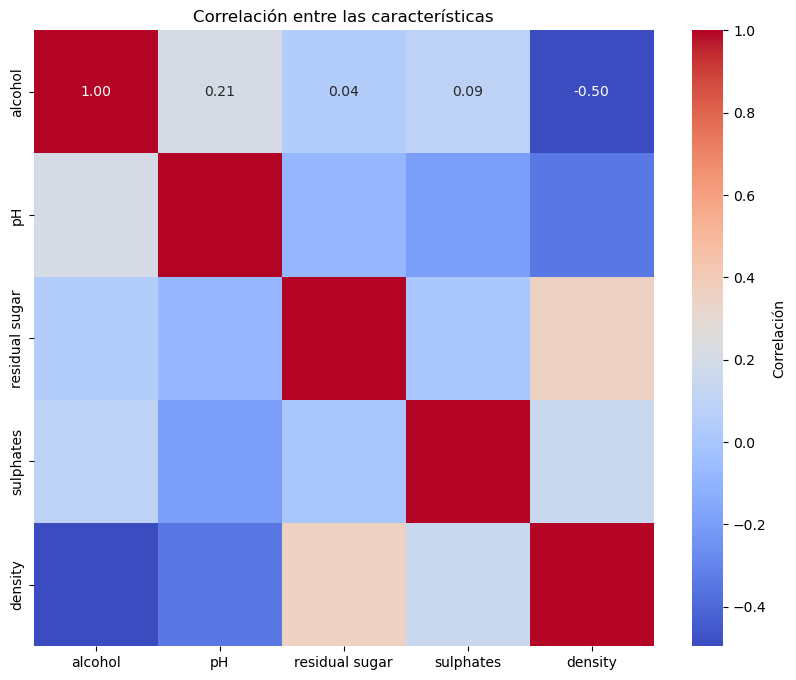

In [16]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor con Seaborn
heatmap = sns.heatmap(predictors.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Añadir título al gráfico
plt.title('Correlación entre las características')

# Añadir barra de color
cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlación')

# Mostrar el gráfico
plt.show()


In [17]:
#4. Dividir el dataset en test y train para evaluar correctamente el modelo
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)
X_train

,alcohol,pH,residual sugar,sulphates,density
988,9.4,3.16,1.7,0.49,0.99596
334,11.7,3.34,2.5,0.74,0.99630
1497,11.5,3.45,2.3,0.63,0.99508
1377,12.2,3.71,2.3,0.62,0.99530
387,9.6,3.31,1.9,0.54,0.99720
...,...,...,...,...,...
742,9.2,3.46,1.9,0.65,0.99720
1552,11.3,3.51,3.7,0.66,0.99586
74,9.6,3.28,2.5,0.82,0.99840
176,9.5,3.33,2.0,0.47,0.99610


In [18]:
y_train

,quality
988,5
334,7
1497,6
1377,6
387,6
...,...
742,5
1552,6
74,5
176,5


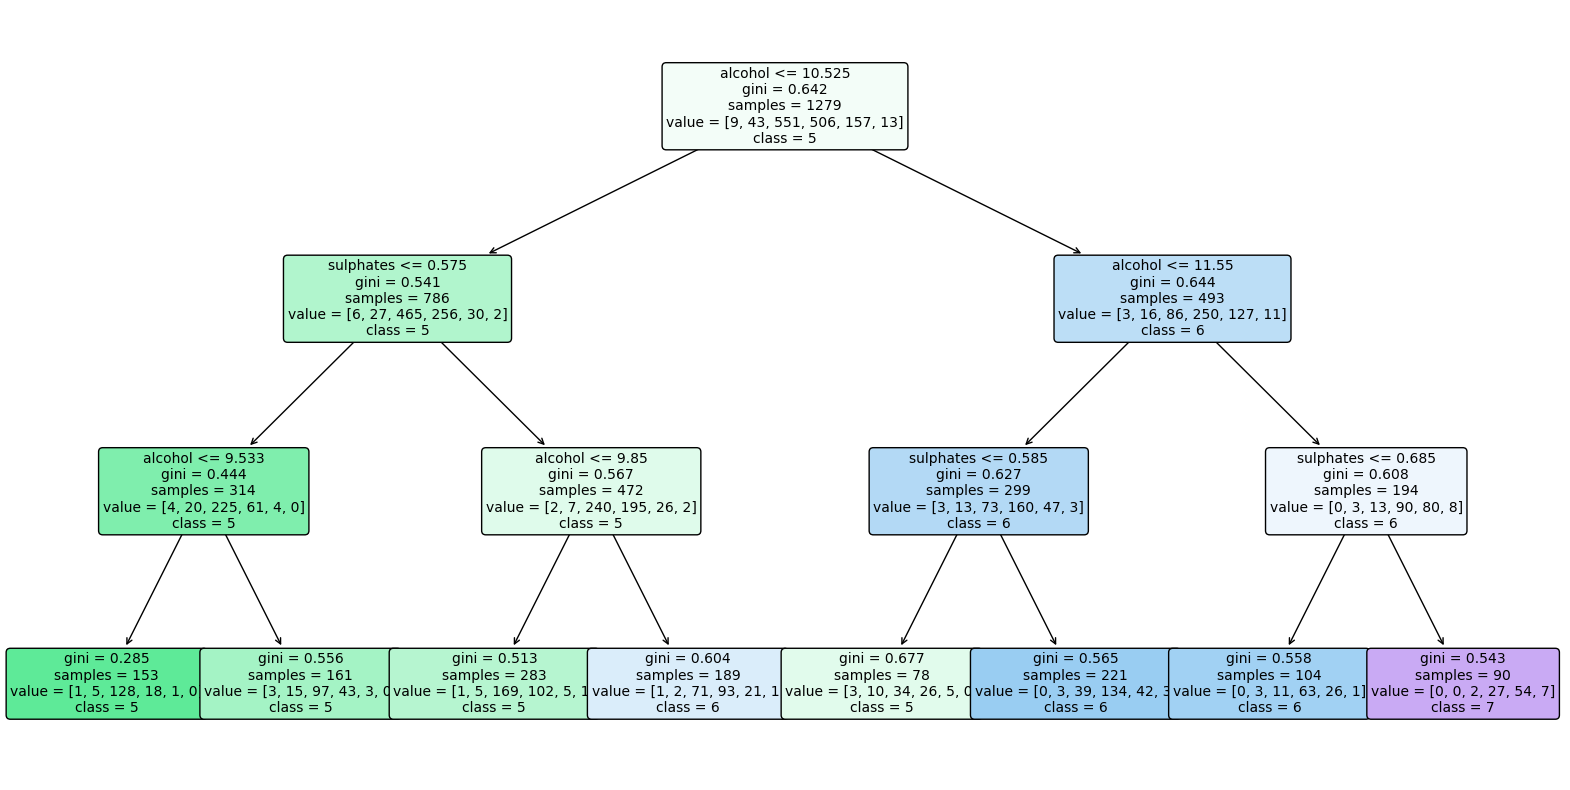

In [26]:
#5. Entrenar el modelo configurando los hiperparámetros
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier(max_depth=3) 
arbol = tree.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plt.rcParams['font.size'] = 12
plot_tree(arbol, feature_names=predictors.columns, class_names=[str(i) for i in arbol.classes_], filled=True, rounded=True, fontsize=10)
plt.show()

In [25]:
#6. Evaluar el desempeño del modelo en el conjunto Test con métricas como precisión, recall, F1-score, etc
predicciones = arbol.predict(X_test)
predicciones

array([5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 7, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5,
       5, 6, 6, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 7, 5,
       6, 5, 7, 5, 6, 5, 5, 5, 6, 5, 7, 6, 6, 7, 5, 7, 5, 5, 6, 7, 5, 6,
       6, 6, 7, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5,
       7, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 6, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 5, 5, 6, 5, 6, 6, 6, 5, 7, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 5,
       5, 6, 5, 6, 5, 5, 7, 5, 5, 5, 5, 6, 7, 5, 5, 7, 6, 5, 5, 5, 6, 5,
       5, 7, 6, 6, 5, 5, 5, 7, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 7, 7, 6, 5, 6,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 7, 6, 5, 7, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 6, 6, 6, 5,

In [31]:
precision_total = accuracy_score(y_test, predicciones)
precision_por_clase = precision_score(y_test, predicciones, average=None, zero_division=1)
print(f"Precisión del modelo: {precision_total:.4f}")
print("Precisión por clase:")
for clase, precision in enumerate(precision_por_clase):
    print(f"Clase {clase}: {precision:.4f}")

Precisión del modelo: 0.5531
Precisión por clase:
Clase 0: 1.0000
Clase 1: 1.0000
Clase 2: 0.6012
Clase 3: 0.5122
Clase 4: 0.4167
Clase 5: 1.0000


In [33]:
crosstab_result = pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])
print("Tabla Cruzada entre Predicciones y Valores Reales:")
print(crosstab_result)

Tabla Cruzada entre Predicciones y Valores Reales:
Predicciones    5   6   7
Actual                   
3               0   1   0
4               6   4   0
5             104  25   1
6              60  63   9
7               3  29  10
8               0   1   4


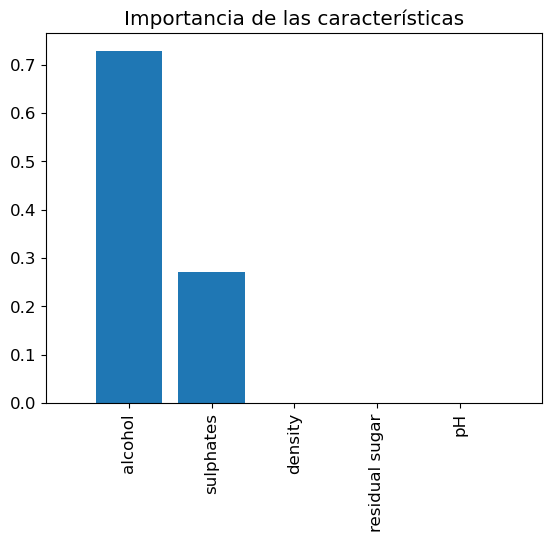

In [34]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
importances = arbol.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), predictors.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()